In [59]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import nltk
import re
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

In [60]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
# importing the training data

df=pd.read_csv('IMDB Dataset.csv')

print(df.shape)
df.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [62]:
#summary of the training data

df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [63]:
#Checking the sentiment count

print("postive ",np.sum(df["sentiment"]=="positive"))
print("negative ",np.sum(df["sentiment"]=="negative"))

postive  25000
negative  25000


In [64]:
#The dataset is balanced

In [65]:
#Clearing the noise in the data - such as html blocks and special characters

def clear_noise(text):
  
  # removing html scripts using Beautiful Soup
  text1=BeautifulSoup(text)
  text1=text1.get_text()

  #removing all other character than alphabets and numbers using regular expression
  text2=re.sub('[^a-zA-Z0-9\s]', '', text1)

  return text2

df["review"]=df["review"].apply(clear_noise)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [66]:
# All html and other special characters got removed

In [67]:
# Now preprocessing the data according to the bag of word model

In [68]:
# 1. Tokenisation (Breaking down the document into words)

def tokenize(text):
  return text.split()

# 2. Stopword Removal (Removal of words which are not meaningful for the model)

sw=set(nltk.corpus.stopwords.words('english'))

def stopword_removal(text):
  useful_words=[w for w in text if w not in sw]
  return useful_words

# 3. Lemmatization (Changing all forms of a verb to root form like plays ,played etc. to play)

wn=nltk.stem.WordNetLemmatizer()

def lemmatize(text):
  words=[wn.lemmatize(w) for w in text]
  return words

# 4. Building a vocabulary (Each sentence will have a feature vector)

def myTokenizer(text):
  text1=tokenize(text.lower())
  text1=stopword_removal(text1)
  text1=lemmatize(text1)
  return text1

cv=CountVectorizer(tokenizer=myTokenizer)

In [69]:
print(sw)

{'some', 'do', 'had', 'an', 'such', 'not', "isn't", 'about', 'mustn', 'you', 're', 'both', 'who', 'y', 'during', 'ain', 'his', 'doesn', 'don', 'haven', 'just', 'him', 'few', 'o', 'into', "didn't", 'isn', 'didn', 'yourselves', 'here', 'needn', "you've", 'herself', "shan't", 'ours', "should've", 'himself', 'her', 'when', 'from', 'were', 'between', "it's", 'any', "mustn't", 'same', 'before', 'nor', "she's", 'they', 'itself', 'then', 'further', 'am', 'being', 'but', 'be', 'no', "couldn't", "that'll", 'ma', 'those', 'them', 'all', "wasn't", 'the', 'this', 'a', 'more', 'as', 'having', 'she', 'out', 'to', "needn't", 'if', "hasn't", 'theirs', 'i', 'on', "mightn't", 'was', 'at', "aren't", 'shan', 'whom', "won't", "weren't", 'your', 'through', 'themselves', 'other', "shouldn't", 'hasn', 'too', 'it', "you'll", 'its', 'that', 'yours', 'what', "don't", 'by', 'with', 'each', 'weren', 'under', 'while', 'over', 'than', 'aren', 'how', 'yourself', 'above', 'very', 'couldn', 'can', 'own', 'off', 'my', 'b

In [70]:
#Splitting the training data - (Training and Testing data)

train_x=df.review[:40000]
train_y=df.sentiment[:40000]

test_x=df.review[40000:]
test_y=df.sentiment[40000:]

print(train_x.shape,type(train_x))
print(test_x.shape,type(test_x))

(40000,) <class 'pandas.core.series.Series'>
(10000,) <class 'pandas.core.series.Series'>


In [71]:
# Applying all the above operations on the training data

vectorised_data=cv.fit_transform(train_x)

In [72]:
print(vectorised_data.shape)

(40000, 181861)


In [73]:
# Converting the test and train data in vectorised form

cv_train=cv.transform(train_x)
cv_test=cv.transform(test_x)

In [74]:
print(cv_train.shape)

(40000, 181861)


In [75]:
# Labelling the sentiment data

lb=LabelBinarizer()
sentiment_data=lb.fit_transform(df['sentiment'])
print(sentiment_data.shape)

train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]

(50000, 1)


In [76]:
# Building the MLP (Multi layer perceptron) Model

model=Sequential()
model.add(Dense(16,activation="relu",input_shape=(181861,)))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                2909792   
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 2,910,081
Trainable params: 2,910,081
Non-trainable params: 0
_________________________________________________________________


In [77]:
hist=model.fit(cv_train,train_sentiments,epochs=60,batch_size=512)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


79/79 [==============================] - 1s 6ms/step - loss: 0.6880 - accuracy: 0.5839
Epoch 2/60
79/79 [==============================] - 1s 6ms/step - loss: 0.6529 - accuracy: 0.7425
Epoch 3/60
79/79 [==============================] - 1s 6ms/step - loss: 0.6134 - accuracy: 0.7831
Epoch 4/60
79/79 [==============================] - 1s 6ms/step - loss: 0.5713 - accuracy: 0.8059
Epoch 5/60
79/79 [==============================] - 1s 6ms/step - loss: 0.5285 - accuracy: 0.8172
Epoch 6/60
79/79 [==============================] - 1s 6ms/step - loss: 0.4886 - accuracy: 0.8320
Epoch 7/60
79/79 [==============================] - 1s 6ms/step - loss: 0.4557 - accuracy: 0.8399
Epoch 8/60
79/79 [==============================] - 1s 6ms/step - loss: 0.4288 - accuracy: 0.8455
Epoch 9/60
79/79 [==============================] - 1s 6ms/step - loss: 0.4026 - accuracy: 0.8518
Epoch 10/60
79/79 [==============================] - 1s 6ms/step - loss: 0.3808 - accuracy: 0.8628
Epoch 11/60
79/79 [===========

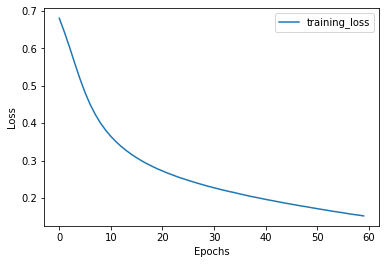

In [78]:
h=hist.history
plt.plot(h['loss'],label="training_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

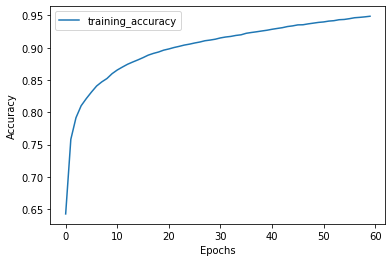

In [79]:
plt.plot(h['accuracy'],label="training_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [80]:
model.evaluate(cv_test,test_sentiments)

313/313 [==============================] - 1s 3ms/step - loss: 0.2913 - accuracy: 0.8874


[0.2912976145744324, 0.8873999714851379]

In [81]:
# Got around 89 percent accuracy.